In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_sleep_health = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df_sleep_health.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df_sleep_health_selected_features = df_sleep_health.drop(columns = ["Person ID", "Gender", "Age"])
selected_features = df_sleep_health_selected_features.columns.tolist()
df_sleep_health_selected_features.head()

,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
categories = [selected_features[0], selected_features[5], selected_features[9]]
encoder1, encoder2, encoder3 = LabelEncoder(), LabelEncoder(), LabelEncoder()
encoders = [encoder1, encoder2, encoder3]

for i in range(len(categories)):
    df_sleep_health_selected_features[categories[i]] = encoders[i].fit_transform(df_sleep_health_selected_features[categories[i]])

df_sleep_health_selected_features.head()

,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,9,6.1,6,42,6,3,126/83,77,4200,2
1,1,6.2,6,60,8,0,125/80,75,10000,2
2,1,6.2,6,60,8,0,125/80,75,10000,2
3,6,5.9,4,30,8,2,140/90,85,3000,1
4,6,5.9,4,30,8,2,140/90,85,3000,1


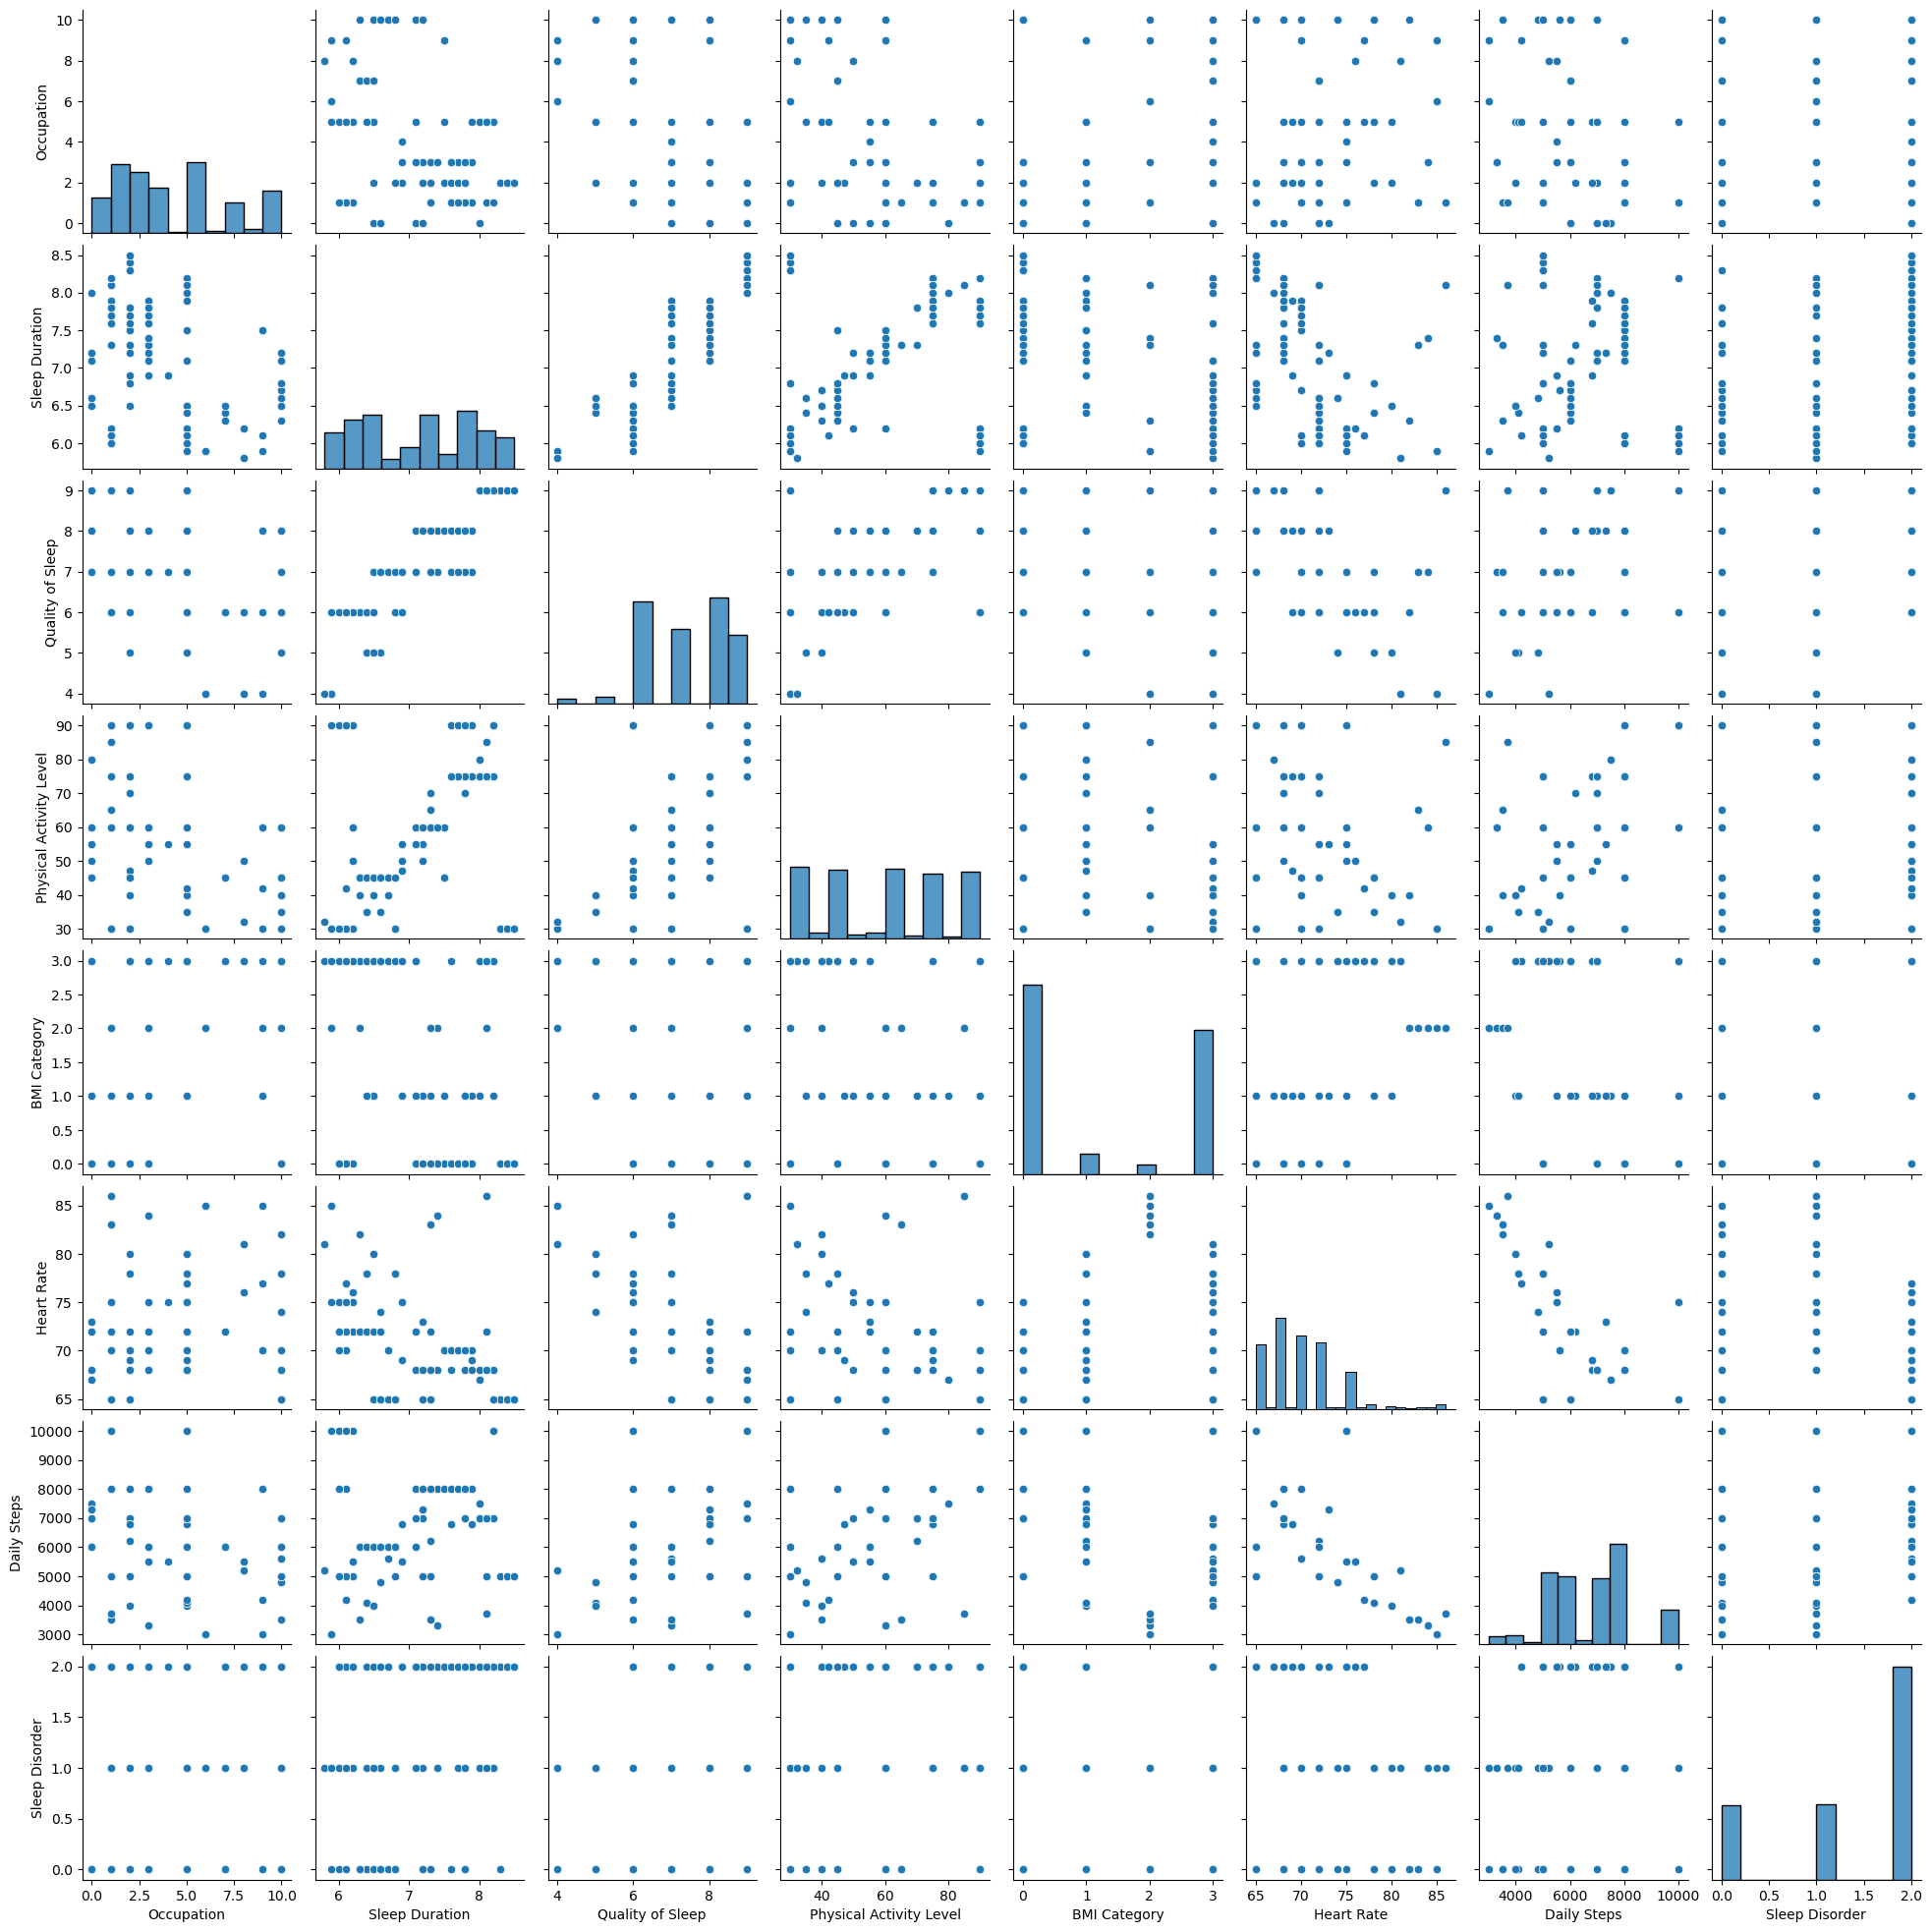

In [5]:
sns.pairplot(df_sleep_health_selected_features.drop(columns = ["Stress Level"]))
plt.show()

In [10]:
features = ['Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']
print(features)

['Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']


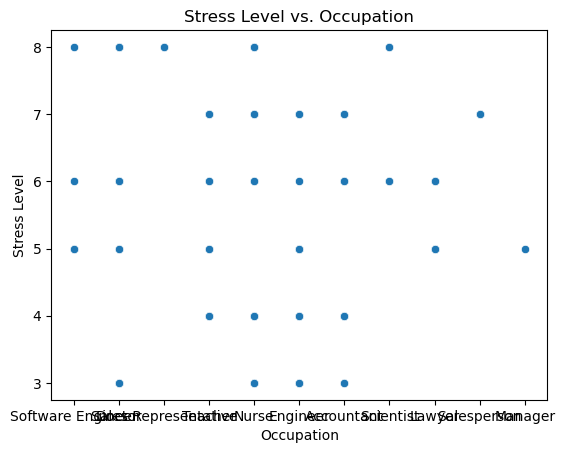

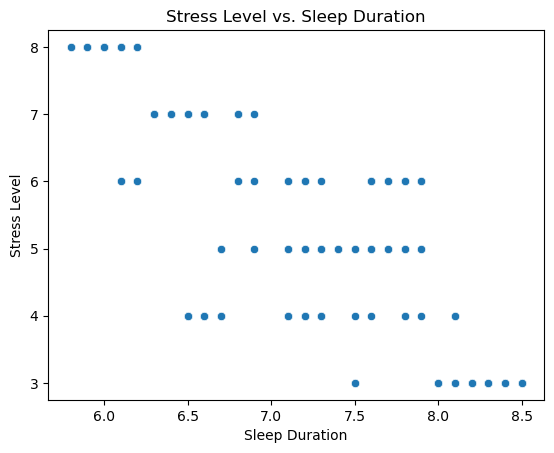

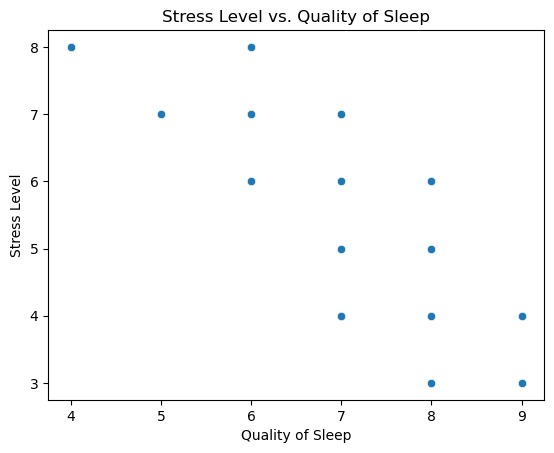

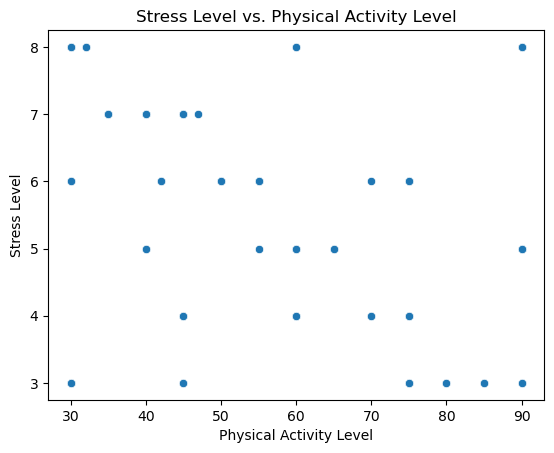

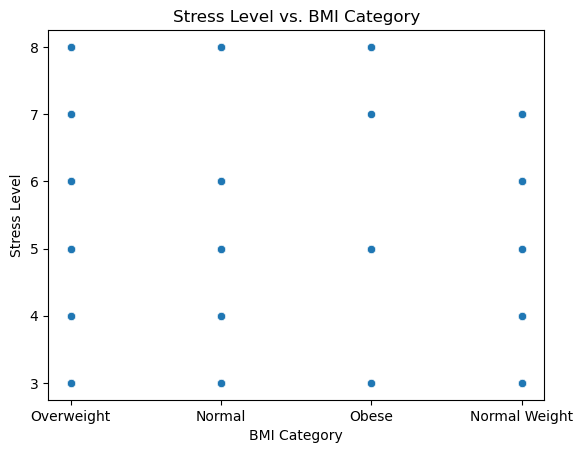

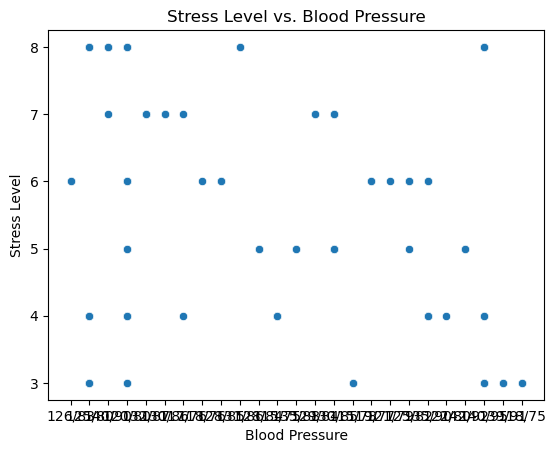

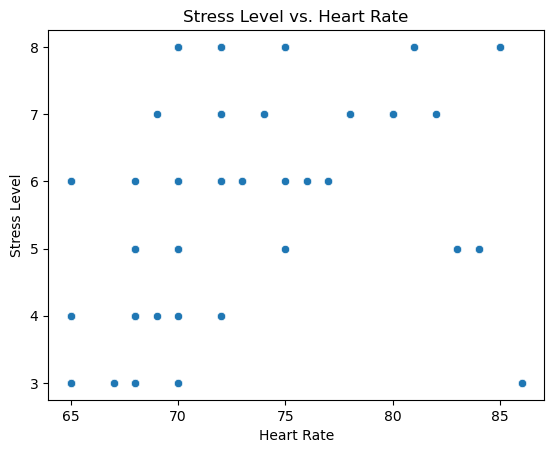

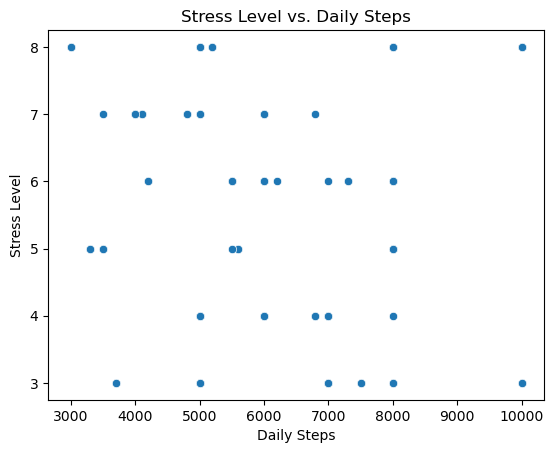

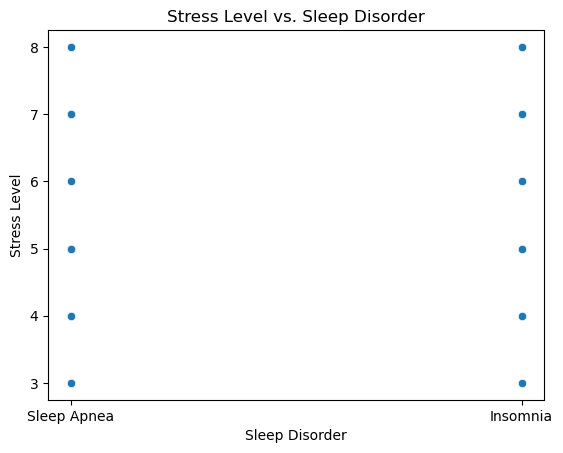

In [7]:
for feature in features:
    if feature not in categories:
        sns.scatterplot(x = df_sleep_health_selected_features[feature], y = df_sleep_health_selected_features["Occupation"])
    else:
        if feature == "Occupation":
            i = 0
        if feature == "BMI Category":
            i = 1
        if feature == "Sleep Disorder":
            i = 2
        sns.scatterplot(x = encoders[i].inverse_transform(df_sleep_health_selected_features[feature]), y = df_sleep_health_selected_features["Stress Level"])
    plt.title("Stress Level vs. " + feature)
    plt.xlabel(feature)
    plt.ylabel("Stress Level")
    plt.show()

In [16]:
selected_features = ['Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']
features_correlation = df_sleep_health_selected_features[selected_features].corr()["Stress Level"]
print("Correlation Between Stress Level with Selected Features:")
print(features_correlation)

Correlation Between Stress Level with Selected Features:
Occupation                 0.021123
Sleep Duration            -0.811023
Quality of Sleep          -0.898752
Physical Activity Level   -0.034134
Stress Level               1.000000
BMI Category               0.163895
Heart Rate                 0.670026
Daily Steps                0.186829
Sleep Disorder            -0.181296
Name: Stress Level, dtype: float64
